In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
n = 1000 # количество точек
xmin = -5
xmax = 5
dx = (xmax - xmin)/n
x = np.arange(xmin, xmax, 10/n)
emin = 0.1
emax = 40
de = 0.1
m = 1; h = 1 # масса в массах эл-на, действие в пос-х Планка

In [63]:
Rres = [] #np.zeros(n)
Tres = [] #np.zeros(n)
n1 = round((emax - emin)/de)
en = [de*i for i in range(n1)]

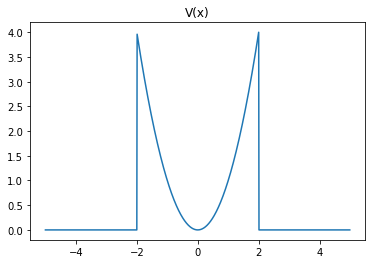

In [64]:
# задаем функцию потенциала
def V(t):
     return np.piecewise(t, [xmin <= t < -2, -2 < t < 2, 2 < t <= xmax],
                    [lambda t: 0,
                     lambda t: t**2,
                     lambda t: 0])
v = [V(x) for x in x]
plt.plot(x, v)
plt.title("V(x)")
plt.show()

In [65]:
for e in en:
    k = np.sqrt(2*m*e)/h
    psi = [0.0 for i in range(n+1)]
    Rr = [0.0 for i in range(n)]
    u = [2 - ((2*m*dx**2)/h**2)*(e - v) for v in v]
    Rr[-1] = 1/(1 - 1j*k*dx)
    for i in range(n-1, 0, -1):
        Rr[i - 1] = 1/(u[i] - Rr[i])
    psi[0] = 2*1j*k*dx/(Rr[0] -1+ 1j*k*dx)
    for i in range(0,n):
        psi[i + 1] = Rr[i]*psi[i]
    r = (abs(psi[0] - 1))**2
    t = (abs(psi[n]))**2
    Rres.append(r)
    Tres.append(t)


In [77]:
#print(len(Tres))
#print(len(Rres))
#print(len(en))
rt = [Tres[i]+Rres[i] for i in range(len(Tres))]

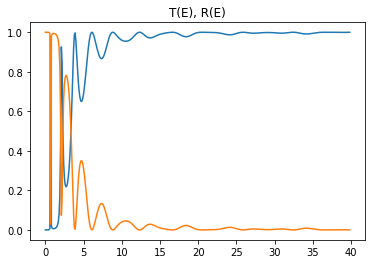

In [79]:
plt.plot(en, Tres)
plt.plot(en, Rres)
#plt.plot(en, rt)
plt.title('T(E), R(E)')
plt.show()


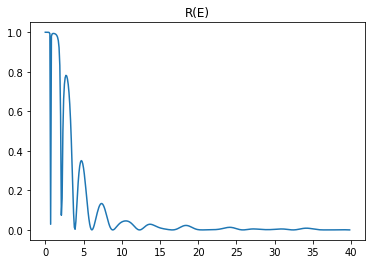

In [68]:
plt.plot(en, Rres)
plt.title("R(E)")
plt.show()